# HW04: Problem 3: Feature Selection

## Description

In this problem we will work with the diabetes dataset from sklearn. This data set is for a regression problem where 10 features are used to predict the progression of diabetes. The dataset is described in more detail [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). You task here is to use multiple techniques of feature selection to try to interpret the strength of the features in the dataset. You will need to use the following techniques:

- Pearson correlation coefficient using r_regression from sklearn (univariate feature selection)
- Mutual information using mutual_info_regression from sklearn (univariate feature selection)
- Random forest feature importance using RandomForestRegressor from sklearn (multivariate feature selection)
- Recursive feature elimination using sklearn.feature.selection.RFE with a Support Vector Regressor SVR (multivariate feature selection)

For each method you will need to plot the feature importance as a bar graph. The importance goes by different names in different algorithms. For example, in r_regression it is just the output (r value) and the mutual information in mutual_info_regression. In random variable it is called feature_importance_ and in RFE it is the ranking_. The bar graph will be sorted from most important features to least important features, with the y value being the importance of that feature, and the x value being the rank but labeled with the feature name.
You will also need to print out the top 5 features for each method. You will need to use the following code to load the data and split it into training and testing sets. You will need to use the training set for all of the feature selection methods.

* Are there 3 features that are selected in the top 5 by all 4 methods? 
* If so, what are they? 
* If not, what are the 3 features that are selected by the most methods? 
* How would it be possible that univariate methods might select different features than multivariate methods? 
* How does dependence between features affect the feature selection methods?

For good habits, make sure you split your code into training and testing. You may not even use the testing data but when you do any analysis such as feature selection, remember you must not use the testing data. You should also make sure you use the same random seed for all of your feature selection methods so that you can compare the results.

## Hints: In sorting features you use "arg" sort. This will return the indices of the sorted array. You can use these indices to sort the feature names.

This kind of code will be useful for plotting the bar graph:

```python
r_inds = np.argsort(np.abs(r_importance))[::-1]
fig, ax = plt.subplots()
rank = np.arange(len(data.feature_names))
ax.bar(rank, r_importance[r_inds])
ax.set_xticks(rank)
ax.set_xticklabels(np.array(data.feature_names)[r_inds])
```

In [38]:
# Some imports you will need
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from numpy import corrcoef
import seaborn as sns
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## Loading and preparing the data

In [39]:
# Load the diabetes data set as X, y
X, y = load_diabetes(return_X_y=True)
# Load the diabetes data set as data to read the description
data = load_diabetes()

In [40]:
# Print out the DESCR attribute to inpect the variables
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [41]:
# Print the array of feature names
print(data.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [42]:
# Split the Data into train/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Check the shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(353, 10) (89, 10) (353,) (89,)


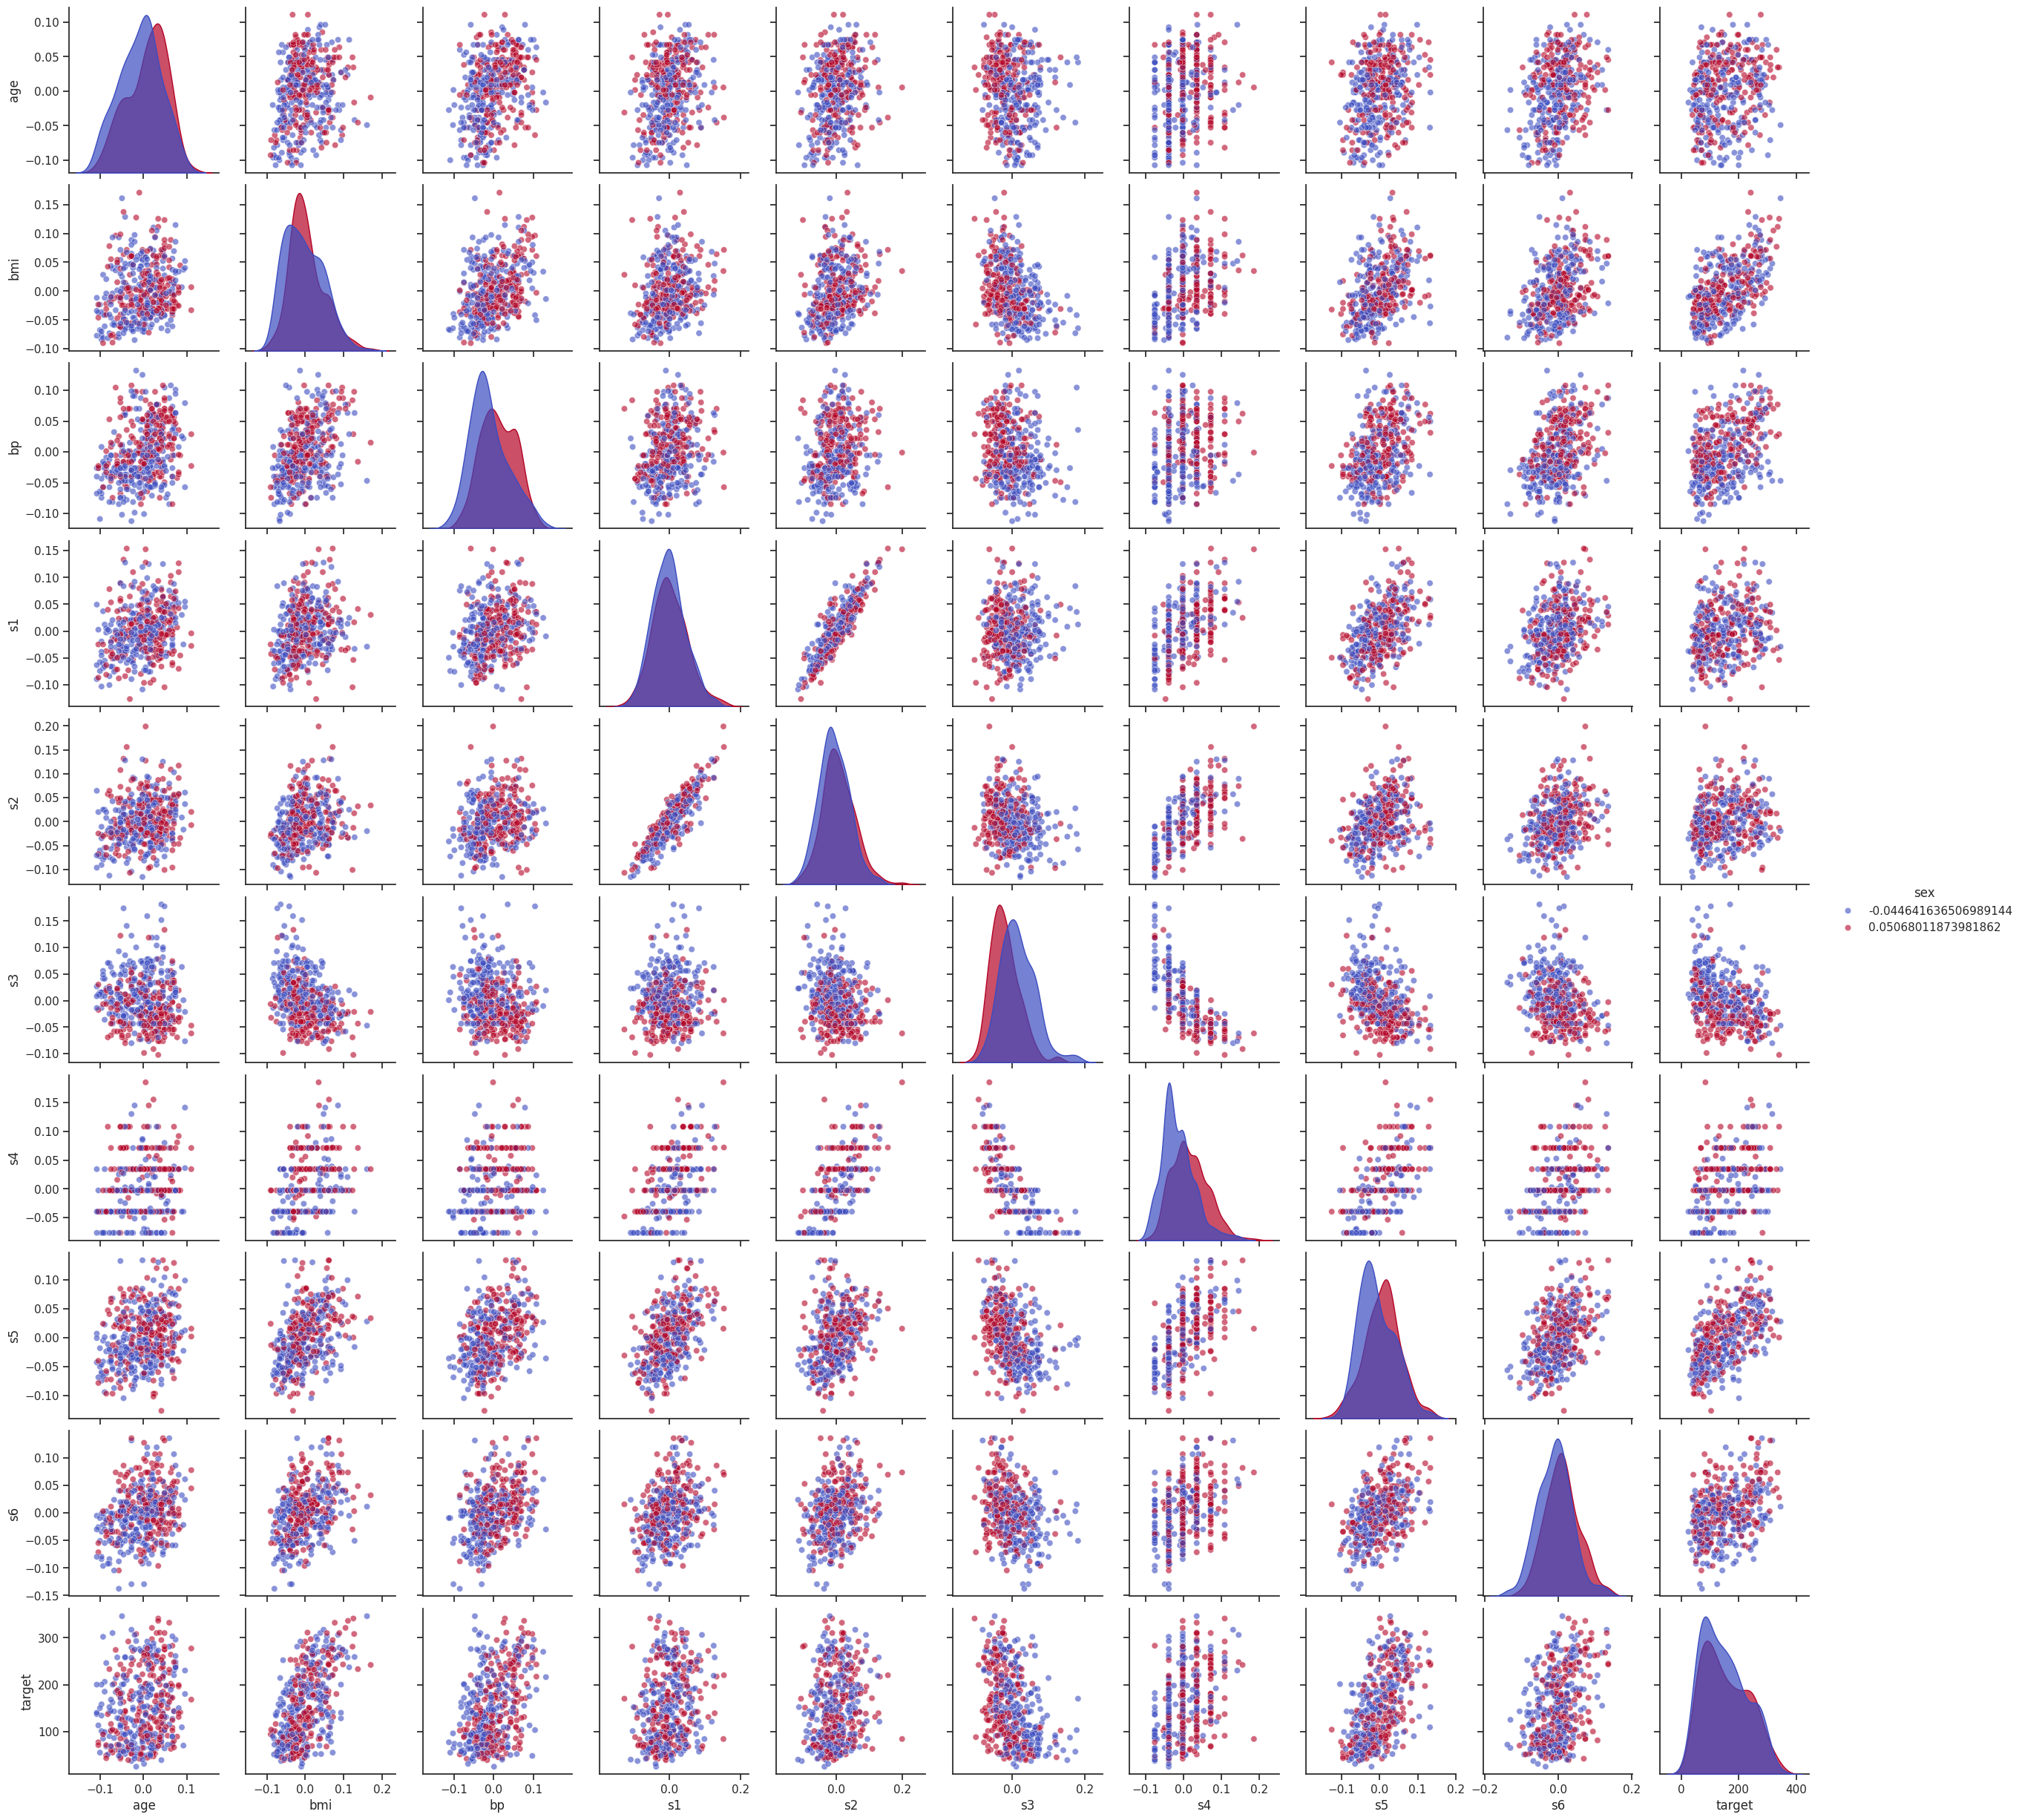

In [59]:
# Do a pair plot 
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


sns.set_theme(style="ticks", color_codes=True)
sns.pairplot(df, hue='sex', palette='coolwarm', plot_kws={'alpha': 0.6}, diag_kws={'alpha': 0.7})

# Show the plot
plt.show()

Q: What does the EDA tell you about the data?

A Here: 

## Univariate feature selection with r_regression

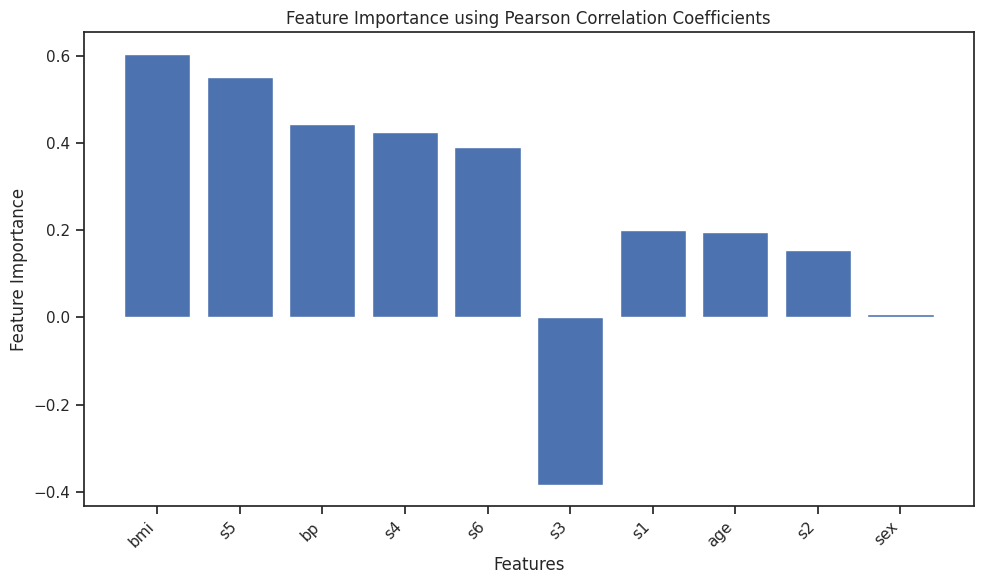

In [49]:
# Use r_regression to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph

r_importance = r_regression(X_train, y_train)
sorted_indices = np.argsort(np.abs(r_importance))[::-1] 

fig, ax = plt.subplots(figsize=(10, 6))
num_features = len(r_importance)

ax.bar(np.arange(num_features), r_importance[sorted_indices])
ax.set_xticks(np.arange(num_features))
ax.set_xticklabels(np.array(data.feature_names)[sorted_indices], rotation=45, ha='right')
ax.set_ylabel("Feature Importance")
ax.set_xlabel("Features")
plt.title("Feature Importance using Pearson Correlation Coefficients")
plt.tight_layout()

plt.show()

In [51]:
# print the top 5 features according to r_regression?
print("Top 5 features:")
for index in sorted_indices[:5]:
    print(f"{data.feature_names[index]}: {r_importance[index]:.4f}")

Top 5 features:
bmi: 0.6048
s5: 0.5522
bp: 0.4448
s4: 0.4251
s6: 0.3904


## Univariate feature selection with mutual information using mutual_info_regression

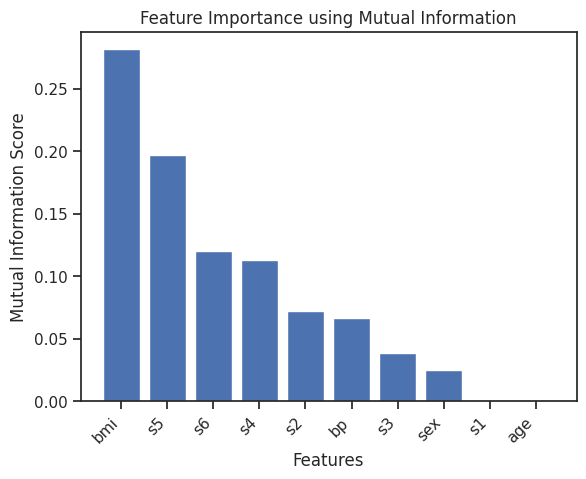

In [52]:
# Use mutual_info_regression to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph

# Use mutual_info_regression to get the feature importance
mi_importance = mutual_info_regression(X_train, y_train)

# Sort by value
mi_inds = np.argsort(mi_importance)[::-1]

# Plot
fig, ax = plt.subplots()
rank = np.arange(len(data.feature_names))
ax.bar(rank, mi_importance[mi_inds])
ax.set_xticks(rank)
ax.set_xticklabels(np.array(data.feature_names)[mi_inds], rotation=45, ha="right")
ax.set_title('Feature Importance using Mutual Information')
ax.set_ylabel('Mutual Information Score')
ax.set_xlabel('Features')

plt.show()

In [53]:
# What are the top 5 features according to mutual_info_regression?
top_5_features_mi = np.array(data.feature_names)[mi_inds][:5]
top_5_mi_values = mi_importance[mi_inds][:5]

# Print the top 5 features and their scores
print("Top 5 features according to Mutual Information:")
for feature, score in zip(top_5_features_mi, top_5_mi_values):
    print(f"{feature}: {score:.4f}")


Top 5 features according to Mutual Information:
bmi: 0.2815
s5: 0.1969
s6: 0.1199
s4: 0.1127
s2: 0.0719


## Multivariate feature selection with Random Forest feature_importance_

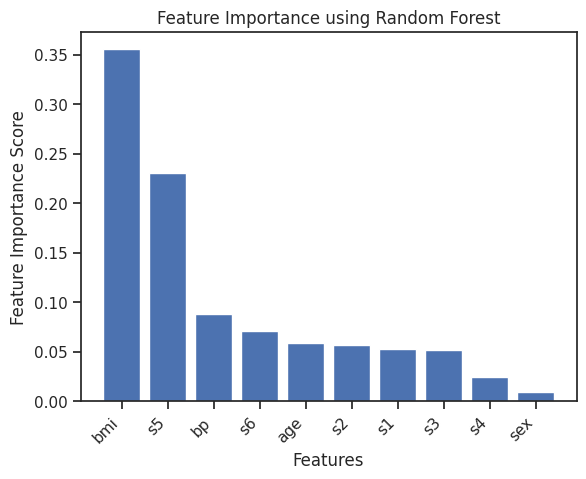

In [54]:
# Use random forest feature_importance_ to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph
# Instantiate and train a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Use feature_importances_ to get the feature importance
rf_importance = rf_regressor.feature_importances_

# Sort by absolute value
rf_inds = np.argsort(rf_importance)[::-1]

# Plot
fig, ax = plt.subplots()
rank = np.arange(len(data.feature_names))
ax.bar(rank, rf_importance[rf_inds])
ax.set_xticks(rank)
ax.set_xticklabels(np.array(data.feature_names)[rf_inds], rotation=45, ha="right")
ax.set_title('Feature Importance using Random Forest')
ax.set_ylabel('Feature Importance Score')
ax.set_xlabel('Features')

plt.show()


In [56]:
# What are the top 5 features according to random forest feature_importance_?
top_5_features_rf = np.array(data.feature_names)[rf_inds][:5]
top_5_rf_values = rf_importance[rf_inds][:5]

print("Top 5 features according to Random Forest Feature Importance:")
for feature, score in zip(top_5_features_rf, top_5_rf_values):
    print(f"{feature}: {score:.4f}")

Top 5 features according to Random Forest Feature Importance:
bmi: 0.3555
s5: 0.2310
bp: 0.0884
s6: 0.0713
age: 0.0586


## Multivariate feature selection with recursive feature elimination (RFE) using a support vector regressor

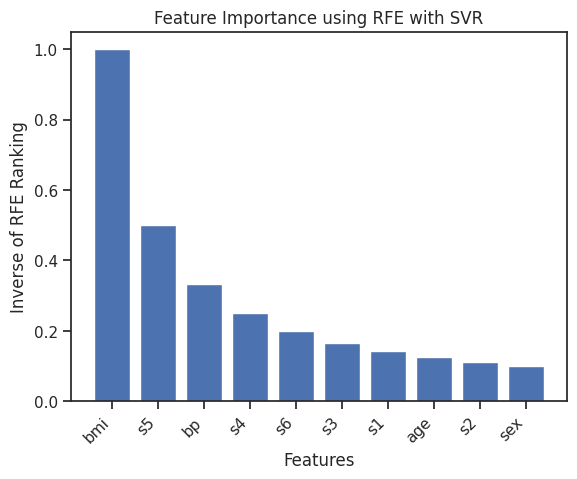

In [57]:
# Use recursive feature elimination (RFE) with a support vector regressor 
# to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph
svr = SVR(kernel="linear")

# Instantiate RFE with the SVR model
rfe = RFE(estimator=svr, n_features_to_select=1)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the feature ranking
rfe_ranking = rfe.ranking_

# Sort the features based on the ranking (1 being the most important)
rfe_inds = np.argsort(rfe_ranking)

# Since RFE doesn't provide importance scores, we use the inverse of rankings as a measure of importance
rfe_importance = 1 / rfe_ranking[rfe_inds]

# Plot
fig, ax = plt.subplots()
rank = np.arange(len(data.feature_names))
ax.bar(rank, rfe_importance)
ax.set_xticks(rank)
ax.set_xticklabels(np.array(data.feature_names)[rfe_inds], rotation=45, ha="right")
ax.set_title('Feature Importance using RFE with SVR')
ax.set_ylabel('Inverse of RFE Ranking')
ax.set_xlabel('Features')

plt.show()


In [58]:
# What are the top 5 features according to RFE with SVR?
top_5_features_rfe = np.array(data.feature_names)[rfe_inds][:5]

print("Top 5 features according to RFE with SVR (by ranking):")
for i, feature in enumerate(top_5_features_rfe, start=1):
    print(f"{i}. {feature}")

Top 5 features according to RFE with SVR (by ranking):
1. bmi
2. s5
3. bp
4. s4
5. s6


## Conclusions

Q1: Are there 3 features that are selected in the top 5 by all 4 methods?

A1: Yes

Q2: If so, what are they? / If not, what are the 3 features that are selected by the most methods? 

A2: 
1. bmi
2. s5
3. bp

Q3: How would it be possible that univariate methods might select different features than multivariate methods?

Univariate methods might pick features that show strong individual correlations with the target but fail to account for how these features interact with each other, possibly leading to redundant selections. In contrast, multivariate methods evaluate the collective strength of features, allowing them to discern and discount redundancies by considering the interplay among features.

Q4: How does dependence between features affect the feature selection methods?

Feature dependence can introduce redundancy and instability in the feature selection process, potentially complicating the identification of truly influential features. However, multivariate methods are typically more adept at navigating through such dependencies, as they evaluate features in combination rather than isolation, thereby mitigating the impact of redundancy.